# Import Required Libraries
Import the necessary libraries, including pandas and networkx.

In [1]:
# Import Required Libraries
import pandas as pd
import networkx as nx

# Load Data
Load the edges, graph indices, and graph labels data from CSV files.

In [2]:
# Load Data
edges_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.edges'
graph_idx_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_idx'
graph_labels_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_labels'

# Load files
edges_df = pd.read_csv(edges_path, header=None, names=['source', 'target'])
graph_idx_df = pd.read_csv(graph_idx_path, header=None, names=['graph_id'])
graph_labels_df = pd.read_csv(graph_labels_path, header=None, names=['label'])

# Inspect Data
Inspect the loaded data using shape, describe, and head methods.

In [3]:
# Inspect the data
print(edges_df.shape)
print(edges_df.describe())
print(edges_df.head())

print(graph_idx_df.shape)
print(graph_idx_df.describe())
print(graph_idx_df.head())

print(graph_labels_df.shape)
print(graph_labels_df.describe())
print(graph_labels_df.head())

(49149990, 2)
             source        target
count  4.914999e+07  4.914999e+07
mean   2.501941e+05  2.501941e+05
std    9.392147e+04  9.392147e+04
min    1.000000e+00  1.000000e+00
25%    2.174150e+05  2.174150e+05
50%    2.682320e+05  2.682320e+05
75%    3.244170e+05  3.244170e+05
max    3.724740e+05  3.724740e+05
   source  target
0       1       2
1       2       1
2       1       3
3       3       1
4       1       4
(372474, 1)
            graph_id
count  372474.000000
mean     2757.371296
std      1484.695077
min         1.000000
25%      1448.000000
50%      2940.000000
75%      4059.000000
max      5000.000000
   graph_id
0         1
1         1
2         1
3         1
4         1
(5000, 1)
             label
count  5000.000000
mean      1.805000
std       0.898408
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000
   label
0      1
1      1
2      1
3      1
4      1


# Create Bipartite Network
Use networkx to create a bipartite graph where one set of nodes represents graph labels and the other set represents graphs.

In [4]:
# Create Bipartite Network
import networkx as nx
from networkx.algorithms import bipartite

# Create a bipartite graph
B = nx.Graph()

label_mapping = {1: 'a', 2: 'b', 3: 'c'}

# Map the labels in the DataFrame
graph_labels_df['label'] = graph_labels_df['label'].map(label_mapping)


# Add nodes with the bipartite attribute
B.add_nodes_from(graph_labels_df['label'], bipartite=0)  # graph labels
B.add_nodes_from(graph_labels_df.index, bipartite=1)  # graphs

# Add edges between graph labels and graphs
for idx, row in graph_labels_df.iterrows():
    graph_id = idx
    label = graph_labels_df.loc[idx, 'label']  # assuming graph_id is 1-based index
    B.add_edge(graph_id , label)

# Check if the graph is bipartite
print("Is the graph bipartite?", bipartite.is_bipartite(B))

# Print the number of nodes and edges
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

Is the graph bipartite? True
Number of nodes: 5003
Number of edges: 5000


# Visualize Bipartite Network
Visualize the bipartite network using matplotlib or another visualization library.

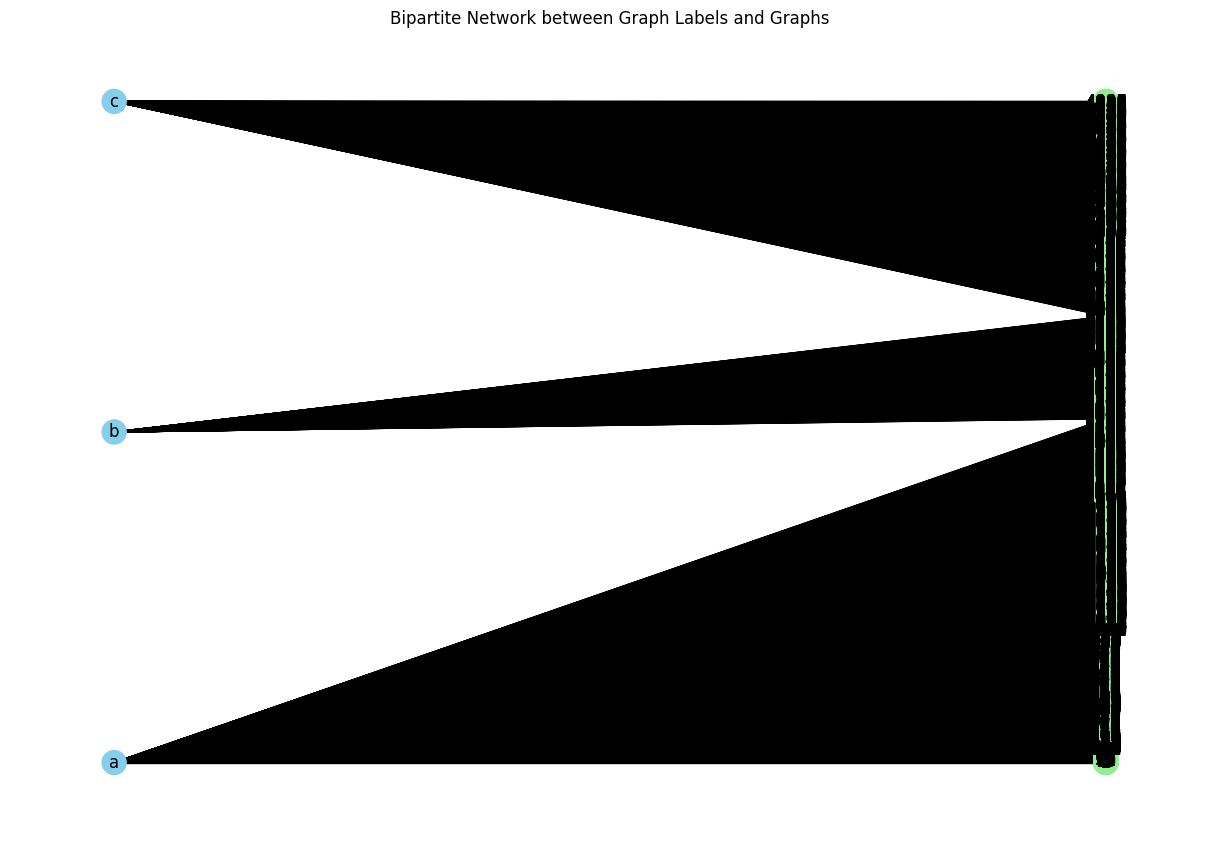

In [5]:
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout

# Separate the nodes by bipartite set
graph_labels_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
graphs_nodes = set(B) - graph_labels_nodes

# Create the layout
pos = bipartite_layout(B, graph_labels_nodes)

# Draw the bipartite graph
plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if n in graph_labels_nodes else 'lightgreen' for n in B.nodes()])
plt.title("Bipartite Network between Graph Labels and Graphs")
plt.show()